### DEMODE03
# Initial Value Non-Homogeneous Linear ODE Example

Solve
\begin{align*}
\dot{x_1} &= x_1 +12x_2 - 60\\
\dot{x_2} &= -x_1 - 6x_2 + 36
\end{align*}    

subject to

\begin{align*}
x_1(0) &=5\\
x_2(1) &=2\\
  t &\in [0, 3]
\end{align*}

## FORMULATION

In [1]:
from compecon import jacobian, ODE

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Phase Diagram Title and Axis Labels

In [2]:
figtitle = 'ODE Phase Diagram';
xlabels  = ['$x_0$', '$x_1$']

### Velocity Function

In [3]:
A  = np.array([[1, 12],[-1, -6]])
b  = np.array([-60,36])

def f(x, A, b):
    return ((A @ x).T + b).T

### Closed-Form Solution 

In [4]:
def X(t):
    return pd.DataFrame({xlabels[0]: 12 - 48*np.exp(-2*t) + 42*np.exp(-3*t),
                  xlabels[1]: 4 + 12*np.exp(-2*t) - 14*np.exp(-3*t)},
                 index = t)

### Initial State

In [5]:
xinit = np.array([6,2])

### Time Horizon

In [6]:
T = 3

## SOLVE ODE ANALYTICALLY

[Text(0.5, 1.0, 'Solution'), Text(0.5, 0, 'Time')]

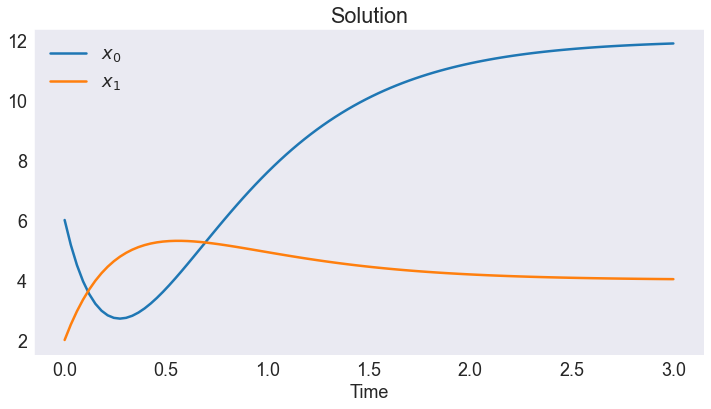

In [7]:
# Time Discretization
N = 100              # number of time nodes
t = np.linspace(0,T, N)  # time nodes
         
# Plot Closed-Form Solution in Time Domain
fig, ax= plt.subplots()
X(t).plot(ax=ax)
ax.set(title='Solution', xlabel='Time')

## SOLVE ODE USING RUNGE-KUTTA METHOD (RK4)

<AxesSubplot:>

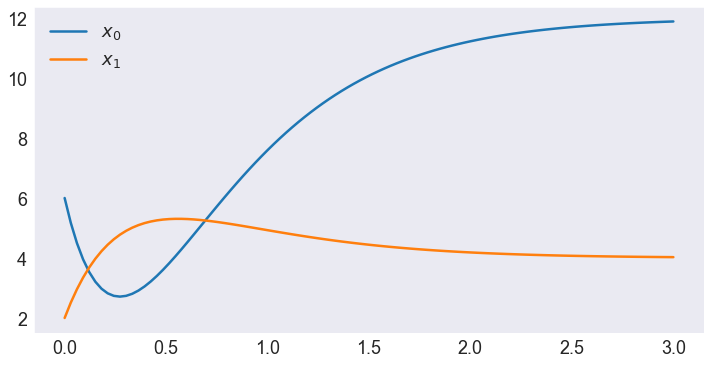

In [8]:
# Solve ODE
problem = ODE(f, T, xinit, A, b)

problem.rk4(n=N, xnames=xlabels)
problem.x.plot()

[Text(0.5, 1.0, 'Runge Kutta Approximation Errors'),
 Text(0.5, 0, 'Time'),
 Text(0, 0.5, 'Error')]

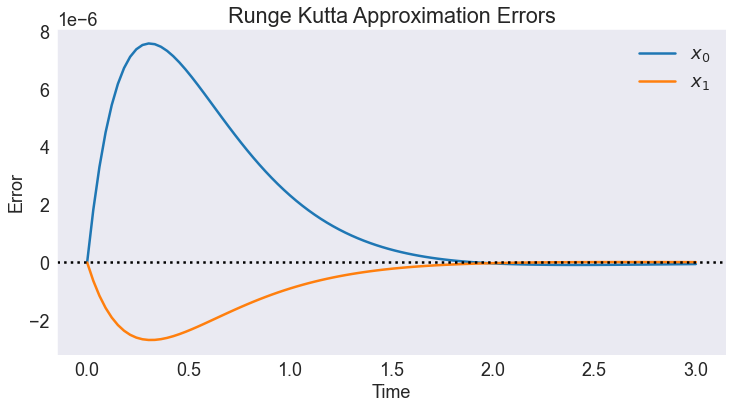

In [9]:
# Plot Runge-Kutta Approximation Errors
fig, ax = plt.subplots()
(problem.x - X(problem.x.index)).plot(ax=ax)
ax.axhline(0,color='black', ls=':')
ax.set(title='Runge Kutta Approximation Errors', xlabel='Time', ylabel='Error')

<AxesSubplot:>

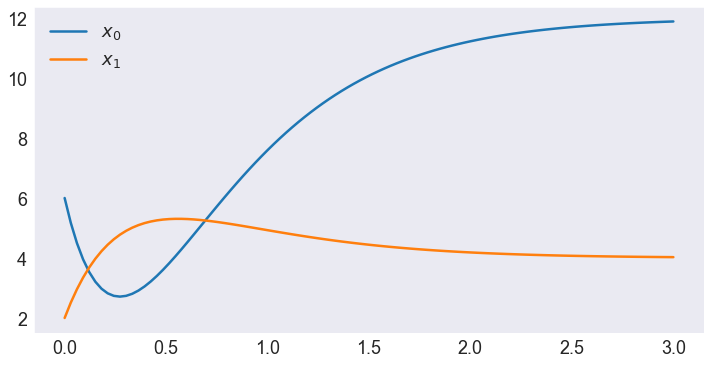

In [10]:
problem.x.plot()

### SOLVE ODE USING COLLOCATION METHOD (ODECOL)

[Text(0.5, 1.0, 'Collocation Approximation Errors'),
 Text(0.5, 0, 'Time'),
 Text(0, 0.5, 'Error')]

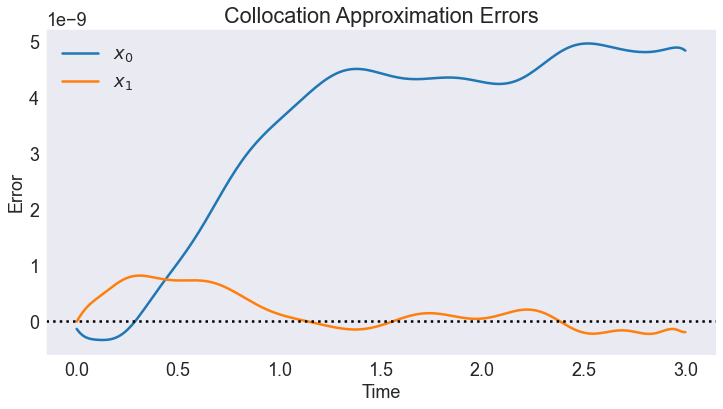

In [11]:
# Solve ODE
n  = 20;    # number of basis functions
problem.solve_collocation(n=n)

# Plot Collocation Approximation Errors
fig, ax = plt.subplots()
t = problem.x.index
(problem.x - X(t)).plot(ax=ax)
ax.axhline(0,color='black', ls=':')

ax.set(title='Collocation Approximation Errors',
       xlabel='Time',
       ylabel='Error')

### STEADY-STATE

In [12]:
# Compute Steady State
xstst = -np.linalg.solve(A,b)
print('Steady State')
print(xstst)
print('Eigenvalues')
print(np.linalg.eigvals(jacobian(f,xstst, A,b)))

Steady State
[12.  4.]
Eigenvalues
[-2. -3.]


### PHASE DIAGRAM

In [13]:
# Plotting Limits
x1lim = [0, 15]  # x1 plotting limits
x2lim = [0,  8]  # x2 plotting limits

# Compute Separatrix
xspx = problem.spx(x0=xstst,T=12)

In [14]:
# Compute Nullclines
x1 = np.linspace(*x1lim, 100)
xnulls = pd.DataFrame({'$x_0$ Nullcline': -(A[0,0]*x1 + b[0])/A[0,1],
                       '$x_1$ Nullcline': -(A[1,0]*x1 + b[1])/A[1,1]},
                     index = x1)

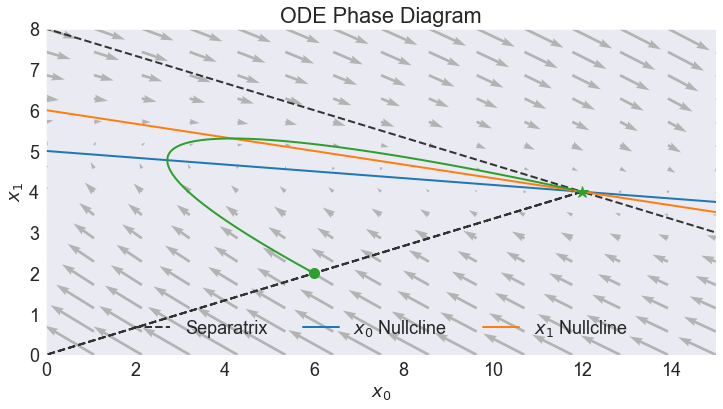

In [15]:
problem.phase(x1lim, x2lim, 
              xnulls=xnulls, 
              xstst=xstst,
              title='ODE Phase Diagram', xlabel='$x_0$', ylabel='$x_1$',
              animated=2.5)